<a href="https://colab.research.google.com/github/farahulyrsd/UAS_3333210052_Farah-Aliefia-Ulyrusda_Kelas-D/blob/main/3333210052_FARAH_ALIEFIA_ULYRUSDA_KELAS_D_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/meetnagadia/walmart-stock-price-from-19722022

Dataset yang digunakan adalah kumpulan data untuk harga saham di Walmart Inc.
Harga dalam mata uang USD (US Dollar).

In [23]:
# https://drive.google.com/file/d/1Q1pLfs6eBmenty4K632LLAWCGVVHGrJT/view?usp=sharing

!gdown 1Q1pLfs6eBmenty4K632LLAWCGVVHGrJT

Downloading...
From: https://drive.google.com/uc?id=1Q1pLfs6eBmenty4K632LLAWCGVVHGrJT
To: /content/WMT.csv
100% 178k/178k [00:00<00:00, 76.9MB/s]


Terdapat date time untuk menganalisis time series atau forecasting sebagai acuan. Terdapat fitur lainnya seperti open yaitu adalah harga di mana keamanan finansial dibuka di pasar saat perdagangan dimulai. High yaitu harga tertinggi di mana saham diperdagangkan selama suatu periode. Low yaitu harga minimum saham dalam suatu periode. Close yaitu harga penutupan umumnya mengacu pada harga terakhir di mana saham diperdagangkan selama sesi perdagangan reguler. Adj close yaitu harga penutupan yang disesuaikan mengubah harga penutupan saham untuk mencerminkan nilai saham tersebut setelah diperhitungkan. Volume yaitu mengukur jumlah saham yang diperdagangkan dalam saham atau kontrak yang diperdagangkan di masa depan atau opsi.

In [24]:
train_data = pd.read_csv('WMT.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-16,57.099998,57.419998,56.639999,56.680000,44.899456,11780800
1,2011-11-17,56.540001,57.189999,56.259998,56.730000,44.939064,10223800
2,2011-11-18,57.029999,57.360001,56.610001,57.230000,45.335129,8982300
3,2011-11-21,56.930000,57.290001,56.380001,56.660000,44.883606,9932200
4,2011-11-22,56.560001,57.130001,56.500000,56.849998,45.034107,7497300


Check missing values

Setelah di cek, tidak ada missing value dalam data karena semua panjang datanya sama

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


Check statistic vales for every features

Kemudian mengecek mean, median, dan nilai maximumnya

In [26]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,90.252091,90.943776,89.619245,90.281677,82.778431,8.267159e+06
std,25.818933,26.070703,25.565153,25.798838,29.207787,4.587082e+06
min,56.389999,57.000000,56.259998,56.419998,44.867764,2.094900e+06
25%,72.215000,72.599998,71.779999,72.220003,62.146697,5.782400e+06
50%,78.580002,79.000000,78.055001,78.620003,68.370143,7.123900e+06
75%,104.664999,105.502499,103.652502,104.637497,98.859221,9.400600e+06
max,153.600006,153.660004,151.660004,152.789993,151.449997,8.089810e+07


Handle datetime data for time series

Membaca fitur Date kedalam datetime agar nanti dalam satu format datetime dan menjadikan date sebagai index

In [27]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-16,57.099998,57.419998,56.639999,56.680000,44.899456,11780800
2011-11-17,56.540001,57.189999,56.259998,56.730000,44.939064,10223800
2011-11-18,57.029999,57.360001,56.610001,57.230000,45.335129,8982300
2011-11-21,56.930000,57.290001,56.380001,56.660000,44.883606,9932200
2011-11-22,56.560001,57.130001,56.500000,56.849998,45.034107,7497300


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

Mengecek datanya seperti apa ketika pasarnya ditutup. Dimulai dari tahun 2012 sampai 2022 harga saham di Walmart Inc mengalami kenaikan

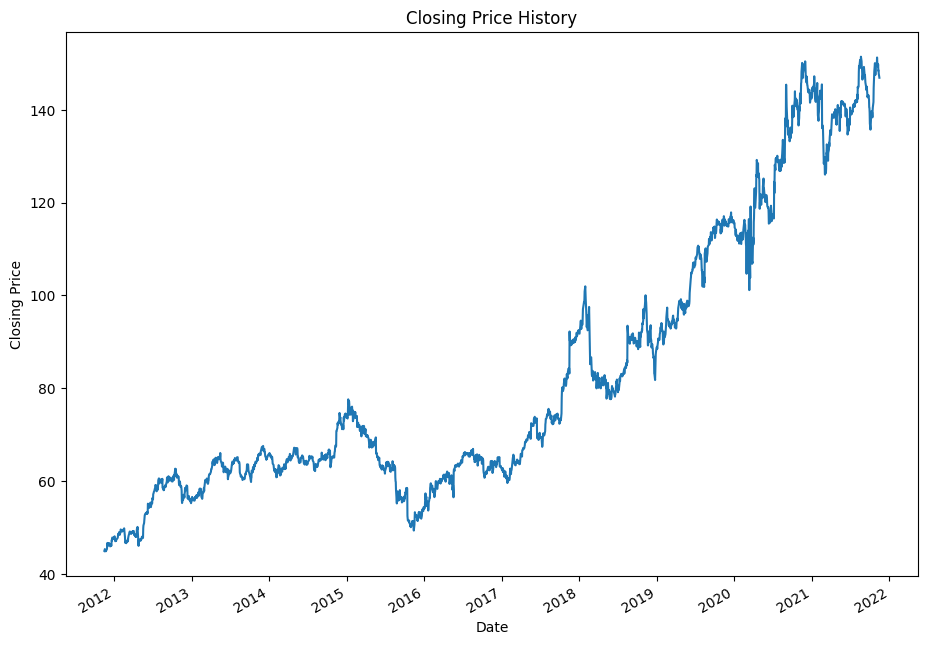

In [28]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Mengecek fitur lainnya. Untuk open,close, high, dan low trend nya naik. Sedangkan volume nya naik turun.

<Figure size 1600x800 with 0 Axes>

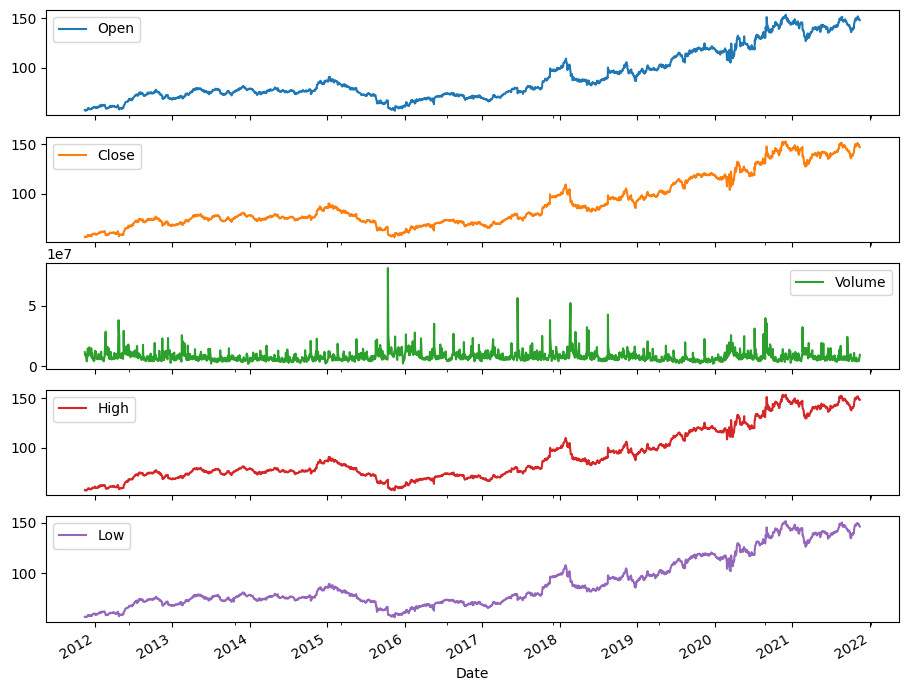

In [29]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Membaca harga tertinggi dan terendah. Kemudian harga penutupan dan harga pembukaannya.

In [30]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Membuat fitur baru untuk masuk ke dalam datasetnya

In [31]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Kemudian membuat harga penutupan saham sebagai labelnya yang dugunakan untuk prediksi

In [32]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

126


<ipython-input-32-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

Menormalisasikan data supaya range harganya tidak terlalu jauh rangenya dan trend nya tidak terlalu lama

In [34]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-34-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Slicing data

In [35]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [36]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-36-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melatih model regresi linear dan mengukur tingkat kepercayaan (confidence) model tersebut

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [39]:
lr_confidence

0.888116232464246

Melatih model Regressor Random Forest dan mengukur tingkat kepercayaan (confidence) model tersebut.

In [40]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [41]:
rf_confidence

0.9362536474476828

Menggambarkan langkah-langkah untuk melakukan prediksi data masa depan menggunakan model Regressor Random Forest dan menyimpan hasil prediksi ke dalam DataFrame dan menghasilkan waktu dalam detik untuk hari berikutnya.

In [42]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-42-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-42-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-42-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Menggambarkan prediksi harga saham selanjutnya yang hasilnya digambarkan dengan grafik warna orange yang terlihat cenderung mengalami kenaikan

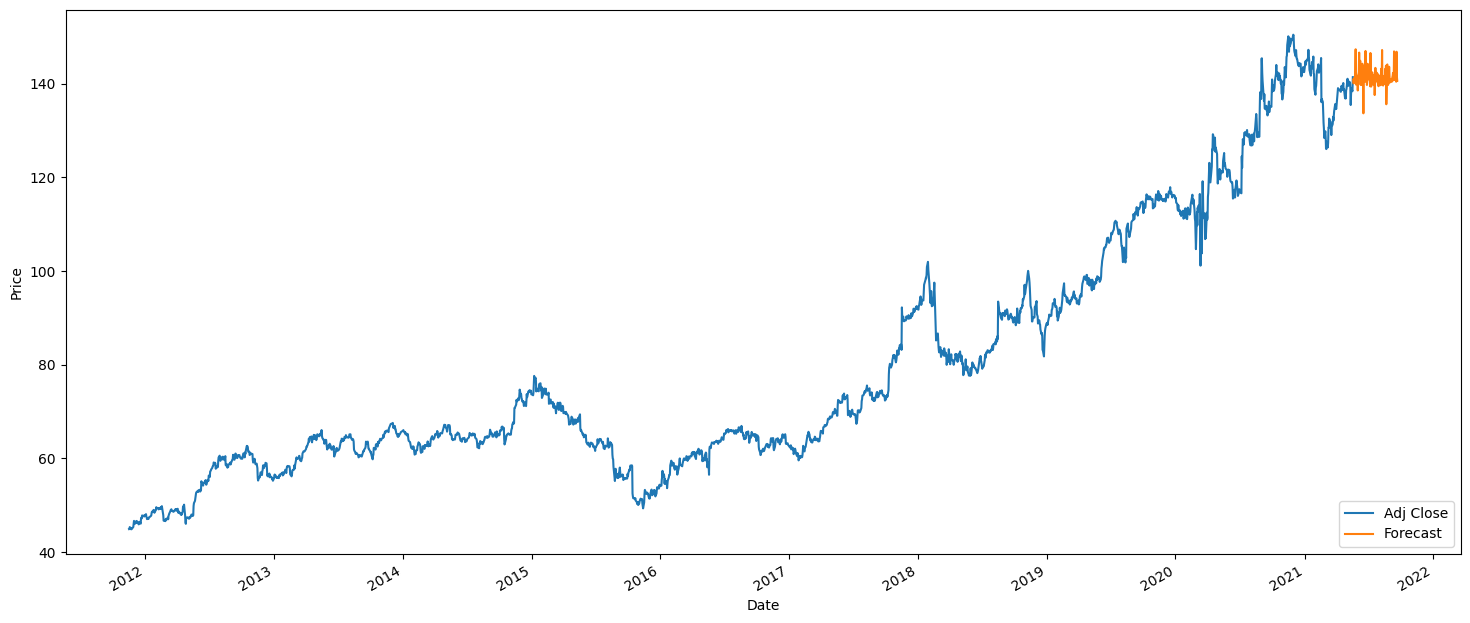

In [43]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()